# Code

In [1]:
code = grabcode("https://web.stanford.edu/~boyd/papers/admm/covsel/covsel.html")


code =

    'function [Z, history] = covsel(D, lambda, rho, alpha)
     % covsel  Sparse inverse covariance selection via ADMM
     %
     % [X, history] = covsel(D, lambda, rho, alpha)
     % 
     % Solves the following problem via ADMM:
     % 
     %   minimize  trace(S*X) - log det X + lambda*||X||_1
     %
     % with variable X, where S is the empirical covariance of the data
     % matrix D (training observations by features).
     %
     % The solution is returned in the matrix X.
     %
     % history is a structure that contains the objective value, the primal and 
     % dual residual norms, and the tolerances for the primal and dual residual 
     % norms at each iteration.
     % 
     % rho is the augmented Lagrangian parameter. 
     %
     % alpha is the over-relaxation parameter (typical values for alpha are 
     % between 1.0 and 1.8).
     % 
     % More information can be found in the paper linked at:
     % http://www.stanford.edu/~boyd/papers/distr_opt_stat_lea

In [2]:
%%file covsel.m

function [Z, history] = covsel(D, lambda, rho, alpha)
% covsel  Sparse inverse covariance selection via ADMM
%
% [X, history] = covsel(D, lambda, rho, alpha)
% 
% Solves the following problem via ADMM:
% 
%   minimize  trace(S*X) - log det X + lambda*||X||_1
%
% with variable X, where S is the empirical covariance of the data
% matrix D (training observations by features).
%
% The solution is returned in the matrix X.
%
% history is a structure that contains the objective value, the primal and 
% dual residual norms, and the tolerances for the primal and dual residual 
% norms at each iteration.
% 
% rho is the augmented Lagrangian parameter. 
%
% alpha is the over-relaxation parameter (typical values for alpha are 
% between 1.0 and 1.8).
% 
% More information can be found in the paper linked at:
% http://www.stanford.edu/~boyd/papers/distr_opt_stat_learning_admm.html
%

t_start = tic;

%% Global constants and defaults

QUIET    = 0;
MAX_ITER = 1000;
ABSTOL   = 1e-4;
RELTOL   = 1e-2;

%% Data preprocessing

S = cov(D);
n = size(S,1);

%% ADMM solver

X = zeros(n);
Z = zeros(n);
U = zeros(n);

if ~QUIET
 fprintf('%3s\t%10s\t%10s\t%10s\t%10s\t%10s\n', 'iter', ...
   'r norm', 'eps pri', 's norm', 'eps dual', 'objective');
end

for k = 1:MAX_ITER

 % x-update
 [Q,L] = eig(rho*(Z - U) - S);
 es = diag(L);
 xi = (es + sqrt(es.^2 + 4*rho))./(2*rho);
 X = Q*diag(xi)*Q';

 % z-update with relaxation
 Zold = Z;
 X_hat = alpha*X + (1 - alpha)*Zold;
 Z = shrinkage(X_hat + U, lambda/rho);

 U = U + (X_hat - Z);

 % diagnostics, reporting, termination checks

 history.objval(k)  = objective(S, X, Z, lambda);

 history.r_norm(k)  = norm(X - Z, 'fro');
 history.s_norm(k)  = norm(-rho*(Z - Zold),'fro');

 history.eps_pri(k) = sqrt(n*n)*ABSTOL + RELTOL*max(norm(X,'fro'), norm(Z,'fro'));
 history.eps_dual(k)= sqrt(n*n)*ABSTOL + RELTOL*norm(rho*U,'fro');


 if ~QUIET
     fprintf('%3d\t%10.4f\t%10.4f\t%10.4f\t%10.4f\t%10.2f\n', k, ...
         history.r_norm(k), history.eps_pri(k), ...
         history.s_norm(k), history.eps_dual(k), history.objval(k));
 end

 if (history.r_norm(k) < history.eps_pri(k) && ...
    history.s_norm(k) < history.eps_dual(k))
      break;
 end
end

if ~QUIET
 toc(t_start);
end

end

function obj = objective(S, X, Z, lambda)
 obj = trace(S*X) - log(det(X)) + lambda*norm(Z(:), 1);
end

function y = shrinkage(a, kappa)
 y = max(0, a-kappa) - max(0, -a-kappa);
end

Created file '/home/wenh06/Jupyter/wenhao/workspace/fl_seminar/code/boyd-admm/covsel.m'.


# Examples

In [3]:
code = grabcode("https://web.stanford.edu/~boyd/papers/admm/covsel/covsel_example.html")


code =

    '% Sparse inverse covariance selection with Gaussian samples
     
     %% Generate problem data
     randn('seed', 0);
     rand('seed', 0);
     
     n = 100;   % number of features 
     N = 10*n;  % number of samples
     
     % generate a sparse positive definite inverse covariance matrix
     Sinv      = diag(abs(ones(n,1)));
     idx       = randsample(n^2, 0.001*n^2);
     Sinv(idx) = ones(numel(idx), 1);
     Sinv = Sinv + Sinv';   % make symmetric
     if min(eig(Sinv)) < 0  % make positive definite
         Sinv = Sinv + 1.1*abs(min(eig(Sinv)))*eye(n);
     end
     S = inv(Sinv);
     
     % generate Gaussian samples
     D = mvnrnd(zeros(1,n), S, N);
     
     %% Solve problem
     
     [X, history] = covsel(D, 0.01, 1, 1);
     
     %% Reporting
     K = length(history.objval);                                                                                                        
     X_admm = X;
     
     h = figure;
     plot(1:K, history.objval, 'k'

### Generate problem data

In [4]:
randn('seed', 0);
rand('seed', 0);

n = 100;   % number of features 
N = 10*n;  % number of samples

% generate a sparse positive definite inverse covariance matrix
Sinv      = diag(abs(ones(n,1)));
idx       = randsample(n^2, 0.001*n^2);
Sinv(idx) = ones(numel(idx), 1);
Sinv = Sinv + Sinv';   % make symmetric
if min(eig(Sinv)) < 0  % make positive definite
 Sinv = Sinv + 1.1*abs(min(eig(Sinv)))*eye(n);
end
S = inv(Sinv);

% generate Gaussian samples
D = mvnrnd(zeros(1,n), S, N);

### Solve problem

In [5]:
[X, history] = covsel(D, 0.01, 1, 1);

iter	    r norm	   eps pri	    s norm	  eps dual	 objective
  1	    0.5604	    0.0878	    7.6521	    0.0156	     66.74
  2	    0.2677	    0.1230	    3.6651	    0.0176	     47.97
  3	    0.0890	    0.1453	    2.2727	    0.0181	     41.51
  4	    0.0341	    0.1608	    1.5731	    0.0182	     38.54
  5	    0.0223	    0.1720	    1.1563	    0.0183	     36.98
  6	    0.0193	    0.1806	    0.8831	    0.0183	     36.08
  7	    0.0168	    0.1872	    0.6927	    0.0183	     35.54
  8	    0.0147	    0.1924	    0.5544	    0.0183	     35.19
  9	    0.0126	    0.1967	    0.4507	    0.0183	     34.97
 10	    0.0110	    0.2001	    0.3710	    0.0183	     34.82
 11	    0.0092	    0.2029	    0.3087	    0.0183	     34.71
 12	    0.0079	    0.2053	    0.2592	    0.0183	     34.64
 13	    0.0074	    0.2072	    0.2192	    0.0183	     34.59
 14	    0.0060	    0.2088	    0.1867	    0.0183	     34.55
 15	    0.0051	    0.2102	    0.1600	    0.0183	     34.52
 16	    0.0044	    0.2114	    0.1378	    0.0183	     34

### Reporting

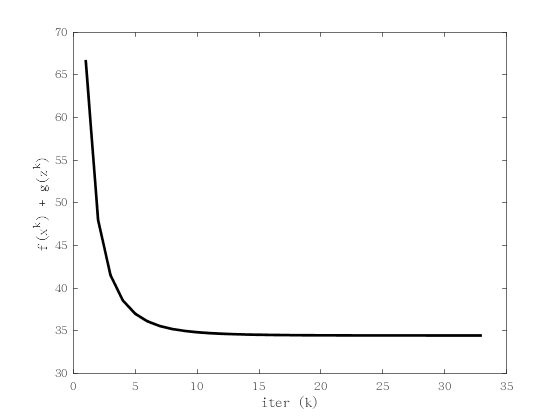

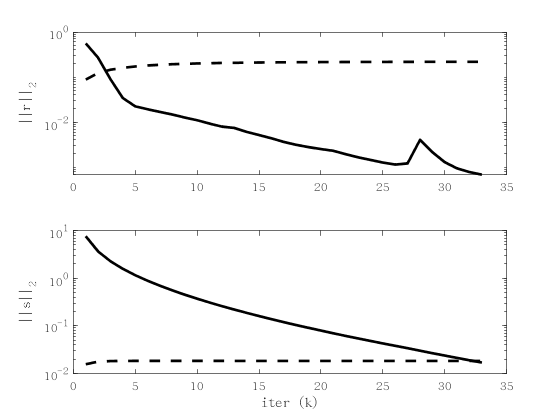

In [7]:
K = length(history.objval);
X_admm = X;

h = figure;
plot(1:K, history.objval, 'k', 'MarkerSize', 10, 'LineWidth', 2);
ylabel('f(x^k) + g(z^k)'); xlabel('iter (k)');

g = figure;
subplot(2,1,1);
semilogy(1:K, max(1e-8, history.r_norm), 'k', ...
    1:K, history.eps_pri, 'k--',  'LineWidth', 2);
ylabel('||r||_2');

subplot(2,1,2);
semilogy(1:K, max(1e-8, history.s_norm), 'k', ...
    1:K, history.eps_dual, 'k--', 'LineWidth', 2);
ylabel('||s||_2'); xlabel('iter (k)');